In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [12]:
# 2. Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [13]:
# 3. Insert sample technical product sales data (unique items)
sample_data = [
    ("Laptop", 5, 55000.0),
    ("Desktop PC", 4, 45000.0),
    ("Monitor 24in", 10, 12000.0),
    ("Mechanical Keyboard", 12, 3500.0),
    ("Wireless Mouse", 20, 1200.0),
    ("External Hard Drive 1TB", 8, 4500.0),
    ("SSD 512GB", 15, 5500.0),
    ("Router", 7, 3000.0),
    ("Printer LaserJet", 6, 22000.0),
    ("Webcam HD", 9, 2500.0),
    ("Graphics Card RTX 3060", 3, 38000.0),
    ("USB-C Hub", 14, 1800.0),
    ("Smartphone", 6, 60000.0),
    ("Tablet", 5, 35000.0),
    ("Smartwatch", 8, 15000.0)
]

In [14]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [15]:
# 4. Run SQL query to get total quantity & revenue per product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [16]:
# 5. Display results
print("Sales Summary:")
print(df)

Sales Summary:
                    product  total_qty   revenue
0                Desktop PC          4  180000.0
1   External Hard Drive 1TB          8   36000.0
2    Graphics Card RTX 3060          3  114000.0
3                  Keyboard         35   52500.0
4                    Laptop         13  715000.0
5       Mechanical Keyboard         12   42000.0
6                   Monitor         17  204000.0
7              Monitor 24in         10  120000.0
8                     Mouse         55   44000.0
9                   Printer         10  180000.0
10         Printer LaserJet          6  132000.0
11                   Router          7   21000.0
12                SSD 512GB         15   82500.0
13               Smartphone          6  360000.0
14               Smartwatch          8  120000.0
15                   Tablet          5  175000.0
16                USB-C Hub         14   25200.0
17                Webcam HD          9   22500.0
18           Wireless Mouse         20   24000.0


<Figure size 864x432 with 0 Axes>

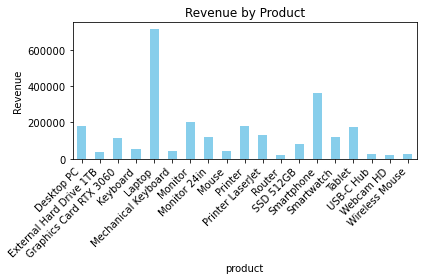

In [18]:
# 6. Plot a bar chart for revenue by product
plt.figure(figsize=(12, 6))  # Make chart wider
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.xticks(rotation=45, ha='right')  # Rotate labels so they don't overlap
plt.tight_layout()
plt.show()


In [21]:
# Close connection
conn.close()